## Prior maths knowledge
Relationship between period and frequency: $f = \frac{1}{T}$ 

Approximation of a derivative: $\frac{df}{dt} \approx \frac{\Delta f}{\Delta t}$

Index laws: $\frac{1}{x^2} = x^{-2}$

  If $y = x^{2/3}$ then $x = y^{3/2}$ 

# GW150914 Signal Analysis Tutorial

On the 14th of September, 2015, the LIGO Scientific Collaboration made the first direct detection of gravitational waves, coined GW150914. The signal came from the merger of two black holes at a distance of $410^{+160}_{−180} Mpc$, and was detected in both interferometers (one in Hanford, Washington, and the other in Livingston, Louisiana), with a delay of $6.9^{+0.5}_{−0.4} ms$. In this tutorial, you will look at the actual LIGO data from the event, reproduce one of the most famous plots in all of physics, and do some back-of-the-envelope calculations to determine some basic properties of the system that created the gravitational waves.

The gravitational wave signal GW150914 arrived in the two detectors with a time difference of $6.9^{+0.5}_{−0.4} ms$. The two detectors are separated by a distance of 3,002 kilometers.
Gravitational waves travel at the speed of light ($3 \times 10^8 ms^{-1}$). Using this travel time, what is the maximum time difference of the same signal in the two different detectors?
What is the minimum time difference? (Think about the possible directions that a gravitational wave can come from and the location of the detectors on the Earth.)

In [1]:
max_time = (3002*10**3) / (3*10**8)
print(max_time, 's')   # ie 10 ms
min_time = 0.0
print(min_time, 's')

0.010006666666666667 s
0.0 s


Import the neccessary packages to manipulate the data and plot your results.

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Load the data into your notebook using NumPy's loadtxt function:

In [3]:
data = np.loadtxt('GW150914_Raw_Data.csv', delimiter=',')

The loadtxt function loads the data into a NumPy array. You can think of a NumPy array as being like a matrix. In this case we have a 2D array with $m$ rows and $n$ columns. Check the number of rows and columns with the following command:

In [4]:
data.shape

(16384, 2)

The output of this should be (16384, 2), which means 16,384 rows and 2 columns. Here, the first column is the time variable and the second the gravitational-wave strain, often labelled $h(t)$. Let's separate these with some meaningful variable names.

In [5]:
time = data[:,0]
ht = data[:, 1]

Note that in Python, the first index of a row, column or list item is given by 0.

Now we can plot our data using Matplotlib's plot function to see what it looks like. The plot should appear automatically. If not, add the line 

plt.show()  

after the following lines:

Text(0, 0.5, 'h(t)')

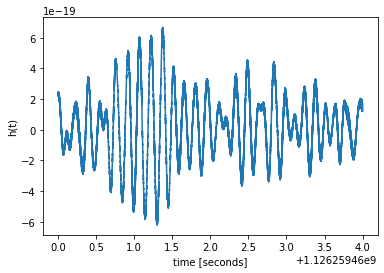

In [6]:
plt.plot(time, ht)
plt.xlabel('time [seconds]')
plt.ylabel('h(t)')

We now have a plot of real data which came from the LIGO detector in Hanford! It doesn't look much like a gravitational wave signal though, so lets have a closer look at what we have.

The horizontal axis shows that we have plotted 4 seconds of data. You should also notice the small +1.12625946e9 attached to this axis. This means that each value annotated on the axis is added by this value - meaning our plot starts at a time value of 1126259460s! The time here is represented in GPS time, which is the number of seconds since midnight UTC on the beginning of the 6th January 1980, measured by the atomic clocks at GPS ground stations and on GPS satellites.  

The gravitational wave signal GW150914 arrived in the Hanford detector on Monday 14th September 09:50:45 GMT 2015, which converts to a GPS time of 1126259462.422. Lets create a variable with this value:

In [7]:
t_event = 1126259462.422

And adjust out plot to be one second either side of the event:

(1126259461.422, 1126259463.422)

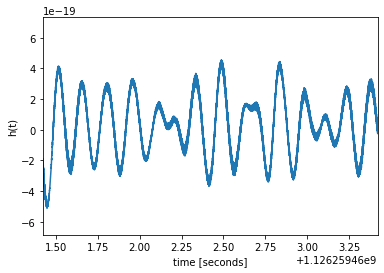

In [8]:
plt.plot(time, ht)
plt.xlabel('time [seconds]')
plt.ylabel('h(t)')
plt.xlim(t_event-1, t_event+1)

This still doesn't look like a gravitational wave. If you notice on the vertical axis, there is a 1e-19 at the top. This is telling us that the tick labels on the y-axis are multiplied by a factor of $10^{-19}$. During the first oberving run of the LIGO detector, the strain of a gravitational wave signal was expected to be of the order of $10^{-22} - 10^{-21}$. So clearly there is some dominant, noisy oscillation that is burying our signal! Estimate the frequency of this oscillation by counting the number of peaks in the plot.

In [9]:
num_peaks = 15  # should accept any value between 13 and 15 
dom_freq = 1/ (2/15)  # = 15/2
print(dom_freq, 'Hz')

7.5 Hz


Let's have a closer look at some of the noise features in the data. To do this, we will create what is call the amplitude spectral density, or ASD, curve which is the square root of the power spectral density, or PSD. The PSD shows how much power there is at a given frequency. The higher the value of the ASD is at a given frequency, the louder the signal or noise is at that frequency.

In [10]:
import matplotlib.mlab as mlab
fs = 1./(time[1] - time[0])
psd, freqs = mlab.psd(ht, Fs=fs, NFFT=int(fs))

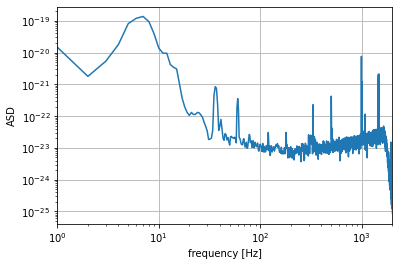

In [11]:
plt.clf()
plt.loglog(freqs, psd**(0.5))
plt.grid()
plt.xlim(1, 2e3)
plt.xlabel('frequency [Hz]')
plt.ylabel('ASD')
plt.savefig('ASD.jpg')     # Save the ASD plot so that you can annotate it later

Mark out the peak that shows the dominant frequency that you found earlier.

The most sensitive region is known as the 'bucket'. The large spectral features in here all originate from instrumental sources. For example, the resonance of the wires that hold up the mirrors at each end of the detector occur at ~ 500Hz and higher harmonics; Additionally, The US mains power operates at 60Hz. 

Mark some of these features on the ASD plot.

What is the most sensitive frequency range for LIGO?

TIP: To annotate using matplotlib try googling "matplotlib.pyplot.annotate".
Alternatively, open your ASD plot with another program such as Microsoft Word and annotate it on there.

These features that you have just marked out show that at certain frequencies, the noise fluctuations are so large that we can't measure gravitational waves at these frequencies! To deal with this, we use a process call 'whitening' the data which basically involves dividing the data through by the noise amplitude spectrum, or the ASD curve without a gravitational wave signal buried in it.

First, lets take the Fourier transform of the data to transform it into the frequency domain,

In [12]:
dt = 1./fs
hf = np.fft.rfft(ht)
hf_freqs = np.fft.rfftfreq(len(ht), dt)

If we check the length of the psd that we found earlier against our Fourier transformed data, we shall see that they are a different size!

In [13]:
print(psd.shape)
print(hf.shape)

(2049,)
(8193,)


This means that we cannot yet do any operations between these two variables until they are the same size. To make them the same size, we will interpolate the psd to add the extra sample points to make it the same length as our frequency-domain strain.

In [14]:
from scipy.interpolate import interp1d
psd_interp_func = interp1d(freqs, psd)
psd_interp = psd_interp_func(hf_freqs)

In [15]:
print(len(psd_interp), len(hf))

8193 8193


Excellent! Now that they are the same length, we can divide the strain by the noise spectrum and then convert it back into the time domain.

In [16]:
white_hf = hf / (np.sqrt(psd_interp / dt / 2.)) # calculate whitened spectrum
white_ht = np.fft.irfft(white_hf, n=len(ht)) # Transform back to time domain
len(white_ht)

16384

(-0.1, 0.05)

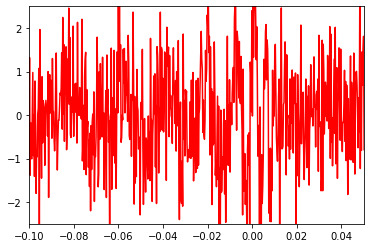

In [17]:
plt.clf()
plt.plot(time - t_event, white_ht, color='r', label='H1 strain')
plt.ylim(-2.5, 2.5)
plt.xlim(-0.1, 0.05)

Alright, so this is looking a lot better but it is still very hard to see a gravitational wave in there so our next trick is to pass the data through what is called a "bandpass filter". This basically filters out the high and low frequencies leaving just the frequency range we want. In this case we want to filter out anything below 20Hz and above 300Hz. 

(-0.1, 0.05)

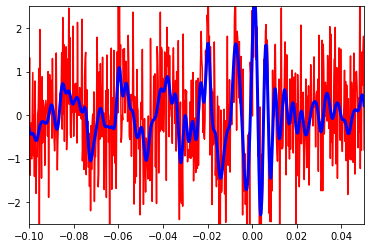

In [18]:
# bandpass filter
from scipy.signal import butter, filtfilt
bb, ab = butter(4, [20.*2./fs, 300.*2./fs], btype='bandpass', output='ba')
whitebp_ht = filtfilt(bb, ab, white_ht)

# Save our whitened, bandpassed data as a csv file
np.savetxt('GW150914_white_bp.csv', np.vstack((time, whitebp_ht)).T, delimiter=',')

plt.clf()
plt.plot(time - t_event, white_ht, color='r', label='H1 strain')
plt.plot(time-t_event, whitebp_ht, color='b', linewidth=3, label='data')
plt.ylim(-2.5, 2.5)
plt.xlim(-0.1, 0.05)

## Numerical Relativity
When analysing a new gravitational-wave signal, GW scientists next use a process called Bayesian inference to estimate the parameters of the signal, such as the black hole masses and spins. In this process, scientists will match millions of "templates" to the signal so see which ones fit the best. Each template is a numerical simulation of a gravitational wave signal which comes from solving Einstein's field equations. They are numerical simulations - which means that they are made using estimations over very short time steps - because it is impossible to solve Einstein's field equations for two bodies analytically. 

You will be doing a simplified version of this process. You have been provided with three different templates which have each been created with different signal parameters. Your task is to plot these signals on top of the data and find which one matches best by eye. 

(Possible challenge: is there another method that you can use to find which template matches best?)

NOTE: You will have to multiply the strain data from the templates by $2 \times 10^{21}$ (2e21 in python) to account for scaling that we introduced during the whitening process.

In [19]:
# Load the numerical data from the 'templates' folder
NR_data1 = np.loadtxt('templates/GW150914_NR1.csv', delimiter=',')
NR_data1.shape

(16384, 2)

(-0.1, 0.05)

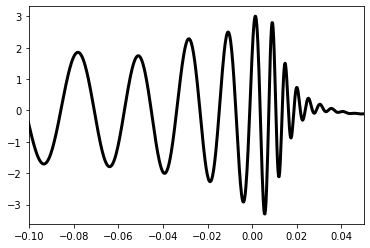

In [20]:
NR_time1 = NR_data1[:,0]
NR_ht1 = NR_data1[:,1]
plt.plot(NR_time1-t_event, NR_ht1*2e21, color='k', linewidth=3, label='NR')
#plt.ylim(-2.5, 2.5)
plt.xlim(-0.1, 0.05)

(-0.2, 0.05)

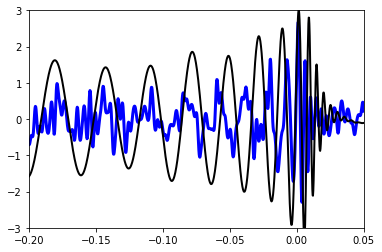

In [21]:
# Plot the template on top of the signal
plt.clf()
plt.plot(time-t_event, whitebp_ht, color='b', linewidth=3, label='data')
plt.plot(NR_time1-t_event, NR_ht1*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.2, 0.05)

(-0.1, 0.05)

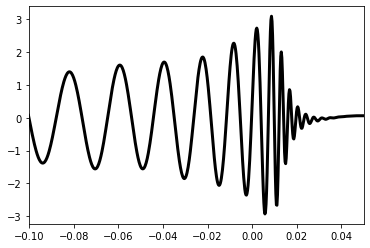

In [22]:
NR_data2 = np.loadtxt('templates/GW150914_NR2.csv', delimiter=',')
NR_time2 = NR_data2[:,0]
NR_ht2 = NR_data2[:,1]
plt.plot(NR_time2-t_event, NR_ht2*2e21, color='k', linewidth=3, label='NR')
plt.xlim(-0.1, 0.05)

(-0.2, 0.05)

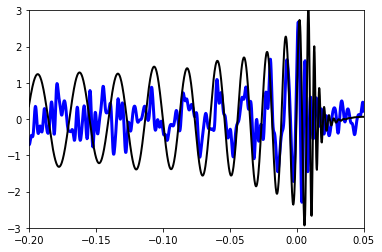

In [23]:
# Plot the template on top of the signal
plt.clf()
plt.plot(time-t_event, whitebp_ht, color='b', linewidth=3, label='data')
plt.plot(NR_time2-t_event, NR_ht2*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.2, 0.05)

(-0.1, 0.05)

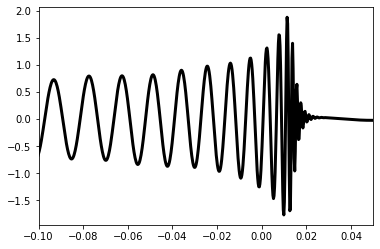

In [24]:
NR_data3 = np.loadtxt('templates/GW150914_NR3.csv', delimiter=',')
NR_time3 = NR_data3[:,0]
NR_ht3 = NR_data3[:,1]
plt.plot(NR_time3-t_event, NR_ht3*2e21, color='k', linewidth=3, label='NR')
plt.xlim(-0.1, 0.05)

(-0.2, 0.05)

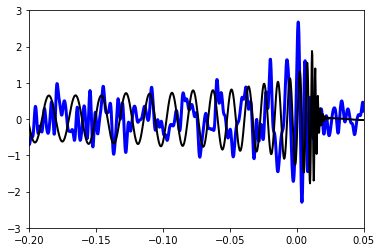

In [25]:
# Plot the template on top of the signal
plt.clf()
plt.plot(time-t_event, whitebp_ht, color='b', linewidth=3, label='data')
plt.plot(NR_time3-t_event, NR_ht3*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.2, 0.05)

We can see that the second template appears to fit the best. Lets plot it again without the data signal.

(-0.2, 0.05)

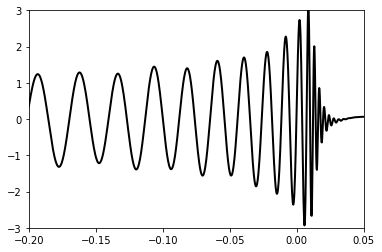

In [26]:
plt.clf()
plt.plot(NR_time2-t_event, NR_ht2*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.2, 0.05)

Binary black hole mergers are characterized by a quantity called the chirp mass, M, which is defined in terms of the masses of the individual components as

$\mathcal{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$ .        (1)

It turns out that the frequency evolution of a GW signal is dependent on the chirp mass according to the following relationship,

$\frac{df}{dt} = \frac{96 \pi^{8/3}}{5 c^5} (G \mathcal{M})^{5/3} f^{11/3}$ .       (2)

Using the last plot we made, estimate the frequency of the signal at the merger (when the signal amplitude is at its greatest). It may help you to change the xlim.

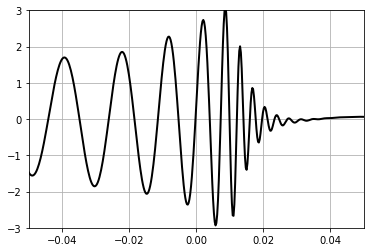

In [27]:
plt.clf()
plt.plot(NR_time2-t_event, NR_ht2*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.05, 0.05)
plt.grid(True, which='both')

In [28]:
# The period starting from the 0,0 crossing is approximately 0.01s
T_merge = 0.01
f_merge = 1./T_merge
print(f_merge, 'Hz')
# Anything between 100-200Hz is good.

100.0 Hz


Adjust your x-axis in the plot again and make a rough estimate of df/dt over the last 0.2 seconds of the inspiral.

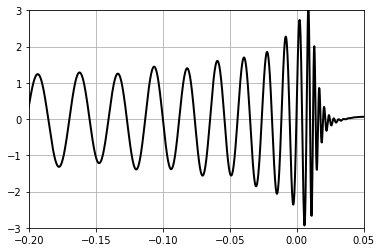

In [29]:
plt.clf()
plt.plot(NR_time2-t_event, NR_ht2*2e21, color='k', linewidth=2, label='NR')
plt.ylim(-3, 3)
plt.xlim(-0.2, 0.05)
plt.grid(True, which='both')

In [30]:
# Time between the first two peaks is about 0.03s
T_init = 0.03
f_init = 1./T_init
print(f_init, 'Hz')
dfdt = (f_merge - f_init)/0.2
print(dfdt, 'Hz/s')
# Values between 300-600Hz are reasonable

33.333333333333336 Hz
333.33333333333326 Hz/s


Rearrange equation (2).
Use the same method as for your previous answer to find the instantaneous df/dt and estimate the chirp mass of this signal in units of solar masses.
HINT: find df/dt and f using two periods of the waveform.

Rearrangement of (2) yields

$\mathcal{M} = \frac{1}{G} (\frac{df}{dt} \frac{5c^5}{96\pi^{8/3}} f^{-11/3})^{3/5}$

In [31]:
G = 6.67e-11        # m^3 / kg / s
M_solar = 2.e30     # kg
c = 3e8             # m / s
dfdt = 122.         # Hz / s
f = 40.             # Hz

chirp_mass = (1./G) * (dfdt * 5*c**5/(96*np.pi**(8./3.)) * f**(-11./3.))**(3./5.)
print(chirp_mass/M_solar, 'solar masses')
# Most marks should be given for working out. Answers may vary from 25M_odot to 60M_odot

29.381321035333414 solar masses


Now, assume that the system is an equal mass binary (i.e. $m_1 = m_2$). Using your estimation for the chirp mass and Kepler's third law,

$\frac{P^2}{a^3} = \frac{4\pi^2}{G(m_1 + m_2)}$,

estimate the separation of the two bodies in the binary at the time that they merged.

It will help to know that $P = 2/f_{gw}$ is the orbital period, which is half the gravitational wave period and that a, the semi-major axis will give the orbital separation.

$m_1 = m_2 => m_1 = 2^{1/5}\mathcal{M}$.
Rearranging Kepler's law for a gives,

$a = (\frac{2Gm_1}{f_{gw}^2\pi^2})^{1/3}$

In [32]:
m1 = 2**(1./5.) * chirp_mass 
# Note that we use f_merge

a = ((2 * G * m1)/(f_merge**2 * np.pi**2))**(1./3.)
print(a/1000., 'km')

450.1816609519126 km


Calculate the Schwarzschild horizon of each object, given by $R_S = 2Gm_1/c^2$. What does this tell us about the nature of the objects that merged?

In [33]:
Rs = 2*G*m1/(c**2)
print(Rs/1000., 'km')

100.0508156399933 km


We can see that the orbital separation is only twice that of the sum of the Schwarzschild horizons. The only objects with masses $> 10M_{\odot}$ that we know of are stars and black holes. Stars have radii on the order of $10^3 - 10^6$ km and so two stars could not have gotten this close to eachother. We conclude that the two objects must have been black holes!